# Previsão de desempenho dos alunos

### **Sobre a Base de Dados**

**Descrição**: Este conjunto de dados contém informações sobre o desempenho de alunos do ensino médio em matemática, incluindo suas notas e informações demográficas. Os dados foram coletados em três escolas secundárias nos Estados Unidos.
"Este conjunto de dados foi criado para fins educacionais e foi gerado, não coletado de fontes de dados reais."

Colunas:
- **Sexo**: O sexo do aluno (masculino/feminino)
- **Raça/etnia**: a origem racial ou étnica do aluno (asiática, afro-americana, hispânica, etc.)
- **Nível de escolaridade dos pais**: o nível mais alto de escolaridade obtido pelo(s) pai(s) ou tutor(es) do aluno
- **Almoço**: Se o aluno recebe almoço grátis ou a preço reduzido (sim/não)
- **Curso de preparação para teste**: Se o aluno concluiu um curso de preparação para teste (sim/não)
- **Pontuação de matemática**: a pontuação do aluno em um teste de matemática padronizado
- **Pontuação de leitura**: a pontuação do aluno em um teste de leitura padronizado
- **Pontuação de redação**: a pontuação do aluno em um teste de redação padronizado

Esse conjunto de dados pode ser usado para várias questões de pesquisa relacionadas à educação, como examinar o impacto da educação dos pais ou dos cursos de preparação para testes no desempenho do aluno. Também pode ser usado para desenvolver modelos de aprendizado de máquina para prever o desempenho do aluno com base em fatores demográficos e outros.

fonte: http://roycekimmons.com/tools/generated_data/exams

### Bibliotecas

In [1]:
# Libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Base de Dados

In [2]:
# Dados
ds = pd.read_csv('./data/exams.csv')
ds

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86
...,...,...,...,...,...,...,...,...
995,male,group C,some college,standard,none,77,77,71
996,male,group C,some college,standard,none,80,66,66
997,female,group A,high school,standard,completed,67,86,86
998,male,group E,high school,standard,none,80,72,62


### Preparação dos Dados

In [3]:
# Valores nulos
ds.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [4]:
# Traduzindo Colunas 
ds.columns = ['sexo', 'raca', 'nivel_escolar_pais', 'almocar', 'curso_preparacao', 'pontos_matematica', 'pontos_leitura', 'pontos_redacao']
ds.head()

,sexo,raca,nivel_escolar_pais,almocar,curso_preparacao,pontos_matematica,pontos_leitura,pontos_redacao
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


In [5]:
# informação
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   sexo                1000 non-null   object
 1   raca                1000 non-null   object
 2   nivel_escolar_pais  1000 non-null   object
 3   almocar             1000 non-null   object
 4   curso_preparacao    1000 non-null   object
 5   pontos_matematica   1000 non-null   int64 
 6   pontos_leitura      1000 non-null   int64 
 7   pontos_redacao      1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
ds.loc[ds['curso_preparacao'] == 'none', 'curso_preparacao'] = 'incomplete'
ds.head()

,sexo,raca,nivel_escolar_pais,almocar,curso_preparacao,pontos_matematica,pontos_leitura,pontos_redacao
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,incomplete,96,93,87
2,female,group D,some college,free/reduced,incomplete,57,76,77
3,male,group B,some college,free/reduced,incomplete,70,70,63
4,female,group D,associate's degree,standard,incomplete,83,85,86


### Gráfico

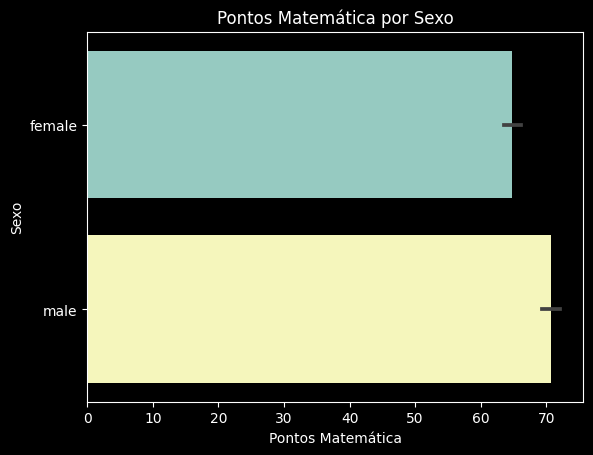

In [7]:
# Sexo em relação a raça
sns.barplot(data=ds, x='pontos_matematica', y='sexo')
plt.title('Pontos Matemática por Sexo')
plt.xlabel('Pontos Matemática')
plt.ylabel('Sexo')
plt.show()

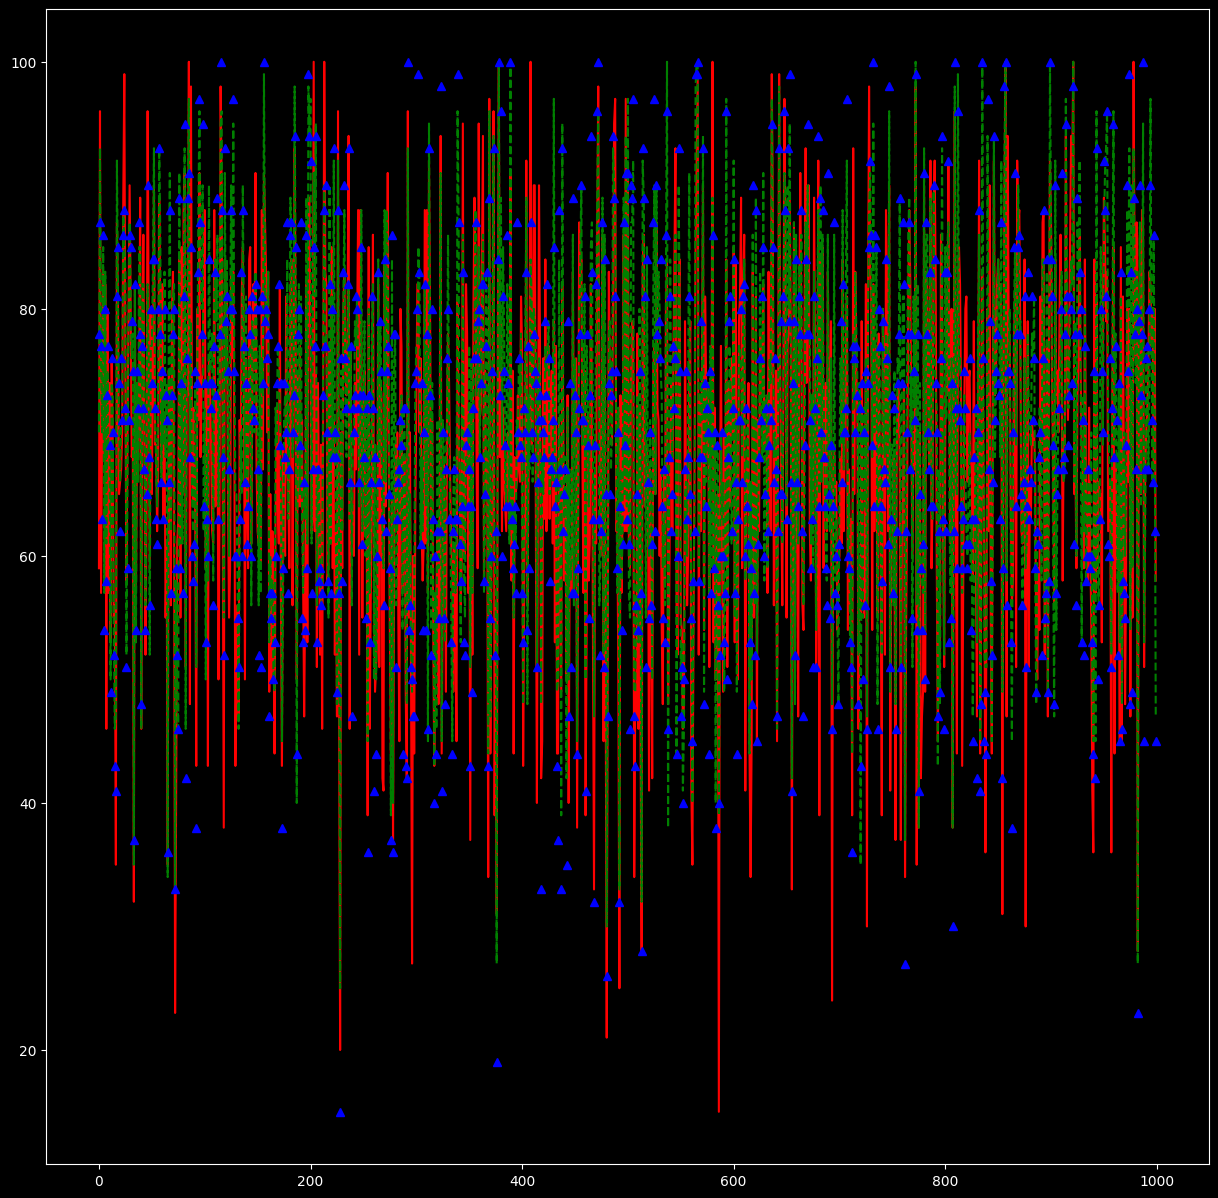

In [8]:
plt.subplots(figsize=(15,15))
plt.plot(ds['pontos_matematica'], 'r-', ds['pontos_leitura'], 'g--', ds['pontos_redacao'], 'b^')
plt.show()

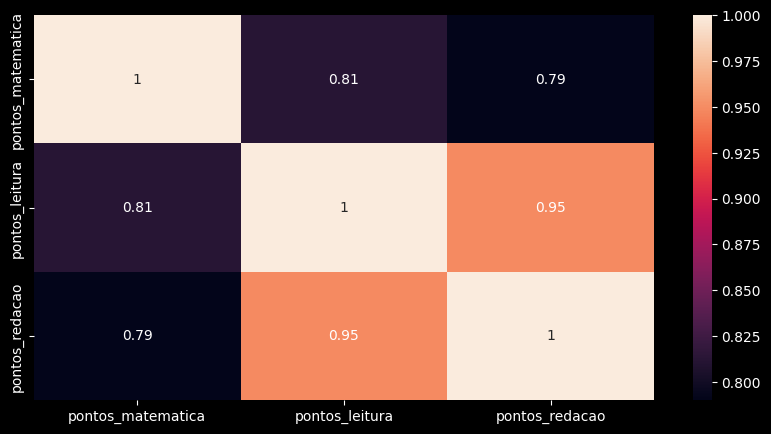

In [9]:
# Gráfico de correlação
ds2 = ds[['pontos_matematica', 'pontos_leitura', 'pontos_redacao']]
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.heatmap(ds2.corr(), annot=True)
